<div class="row">
    <div class="column">
        <img src="https://datasciencecampus.ons.gov.uk/wp-content/uploads/sites/10/2017/03/data-science-campus-logo-new.svg"
             alt="Data Science Campus Logo"
             align="right" 
             width = "340"
             style="margin: 0px 60px"
             />
    </div>
    <div class="column">
        <img src="https://cdn.ons.gov.uk/assets/images/ons-logo/v2/ons-logo.svg"
             alt="ONS Logo"
             align="left" 
             width = "420"
             style="margin: 0px 30px"/>
    </div>


<center><h1><font size=6>Chapter 2</font></h1></center>
<center><h1><font size=7>Model Basics</h1></center>
*By Dr. Laurie Baker and Dr. Daniel J. Lewis*

## Introduction

 * Ideally your model will capture `signals` (i.e. patterns) generated by the phenomenom of interest and ignore `noise` (i.e. random variation) you're not interested in. 
 
 * In model basics you will learn how models work mechanistically, focussing on the important family of linear models. 
 
**Hypothesis generation vs. hypothesis confirmation**

  * Traditionally, one of the focuses of modelling is on **inference**, or confirming that a hypothesis is true. To do it correctly you need to know two things:
  
    1. Each observation can either be used for exploration or confirmation, not both. 
    2. You can use an observation as many times as you like for exploration, but you can only use it once for confirmation. As soon as you use an observation twice, you've switched from confirmation to exploration. 
    
* Note, that in order to confirm a hypothesis, you must use data independent of the data used to generate the hypothesis.


## Learning Objectives

By the end of Chapter 2, learners should know:

*   Model Basics
    *	 What is a model family and fitted model?
    *	 What is the difference between a response and an explanatory variable?
    
*   Model Construction
    *  How to construct a linear model in python?
    *  What are the slope and intercept in a linear model?
    *  Picking out key information from the model table
    *  How to extract specific parameters from the model object.

*  Assessing Model Fit
    *	 How to inspect model residuals to assess model fit?
    *	 How to pick out key information from the table from a fitted model. 
    *  How to use Adjusted R-squared and AIC to compare models. 

**Packages Needed**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data plotting
import seaborn as sns # data visualisation and plotting
import statsmodels.api as sm # statistical modelling package
import statsmodels.formula.api as smf # statistical modelling package with R-like formulas
import scipy.stats as stats # statistical modelling package
import math # mathematical expressions

from sklearn import datasets, linear_model # fetching iris dataset and linear model functions
from sklearn.metrics import mean_squared_error, r2_score # packages to inspect residuals and Adjusted R^2

# Seaborn plot default configurations
sns.set_style("white")

# set the custom size for my graphs
sns.set(rc={'figure.figsize':(8.7,6.27)})

# Chapter 2: Model Basics

## Introduction

 * Ideally your model will capture `signals` (i.e. patterns) generated by the phenomenom of interest and ignore `noise` (i.e. random variation) you're not interested in. 
 
 * In model basics you will learn how models work mechanistically, focussing on the important family of linear models. 


## Model basics

One of the goals of models is to partition data into patterns and residuals. Strong patterns will hide subtler trends. We can use models to peel back layers of structure as we explore a dataset. 

There are 2 key parts to a model, the family of models and the fitted model.
 

 1. **Family of models**
    * define a family of models that express precise, but generic pattern you wish to capture. For example, a straight line $y = ax + b$ or quadratic curve $y = ax^2 + bx + c$. Where $x$ and $y$ are known variables from your data, and $a$, $b$, and $c$ are parameters that can vary to capture different patterns. These formulas are simple to capture in python 
    
    <br>

<img src="../../images/clothesline.jpg"  width="800" height="800" alt="A model family is like a piece of clothing you have different types and shapes depending on what the data is like.">

Image Credit: [Clothesline](https://www.flickr.com/photos/34379543@N06/3468402366) by [Frau Heimlich](https://www.flickr.com/photos/34379543@N06) is licensed under [CC BY-NC-SA 2.0](https://creativecommons.org/licenses/by-nc-sa/2.0/?ref=ccsearch&atype=rich)



<br>

 2. **Fitted model**
    * After you've chosen your model family, the next step is to generate a fitted model from that family that is closest to your data. 
    * the **model family** is expressed as an equation, where the different parameters are able to take on different values to adjust the shape of the fitted line to the data.
    
    <br>
    
<img src="../../images/tailor_fit.jpg"  width="600" height="600" alt="If the model is the garment you can think of model like tailoring a garment to fit our data.">

Image Credit: [John Boyer Bespoke Suit Tailors](https://www.behance.net/gallery/30289889/John-Boyer-Bespoke-Suit-Tailors) by Shayna Grosh is licensed under [CC BY-NC-ND 4.0](https://creativecommons.org/licenses/by-nc-nd/4.0/?ref=ccsearch&atype=rich)


<br>

Note, it is important to understand that a fitted model is just the closest model from a family of models. What is "best" is determined according to some criteria, which we will discuss later.  

**Clothes as an analogy**

If we use clothes as an analogy, the **family of models** is like an assortment of garments you could choose to 'clothe' the data in. Just as some clothes will be more suitable than others depending on what you wish to do (e.g. nice dress to a wedding), the same is true for models. The type of model will depend on the type of data you have and what you wish to do with your analysis. 

**Model fitting** is similar to getting a garment tailored. Just as you might make alterations to improve the fit of a garment, you will adapt the chosen model to get a better fit to the data. 


<div class="alert alert-block alert-success">
<b><font size="4"> Terminology</font> </b> 
<p> 

In the field of data science you will see a number of terms used to refer to the same things. Here, we will use `response variable` to refer to the measured variable you are trying to explain. 

We will use `explanatory variables` to refer to the measured variables that we use to try to explain the response variable. Other terms that you may come across for these concepts include:

* **response variable**: `dependent`, `target` (machine learning) 

* **explanatory variables**: `independent`, `features` (machine learning)

</p>
</div>



## Linear Models

Linear regression is one of the most important and widely used regression techniques. Its main advantage is its simple structure and ease of interpreting results.

Linear models take the mathematical form:

$y = ax + b$

where $y$ is the response variable, $a$ is the slope that quantifies the change in $y$ with increases in the dependent variable $x$, and $b$ is the intercept.



### **Selling irises to nostalgic students**

<img src="../../images/iris_classification.png"  width="800" height="800" alt="Iris Varieties setosa, virginica, and versicolor vary in their sepal and petal lengths and widths.">
Image Credit:  Suruchi Fialoke, October 13, 2016, Classification of Iris Varieties.

A data scientist is setting up a side business of breeding irises to sell to ex-statistics undergraduates who have rosy nostalgic memories of studying the iris dataset when they were budding statisticians. They are interested in the relationship between petal width and other metrics, like petal length, as they find that the irises with the widest petals sell better. 

Let's take a closer look at the iris data to explore the relationship between petal length and petal width.

In [2]:
# Loading and renaming the iris dataset

# Define sklearn_to_df function to convert from sklearn to a pandas dataframes


def sklearn_to_df(sklearn_dataset):
    
    df = pd.DataFrame(sklearn_dataset.data,
                      columns=sklearn_dataset.feature_names)
    
    df['target'] = pd.Categorical.from_codes(sklearn_dataset.target, 
                                             sklearn_dataset.target_names)
    return df


# import and convert format of iris data from sklearn to a pandas dataframe
df_iris = sklearn_to_df(datasets.load_iris())


df_iris = df_iris.rename(columns={'sepal length (cm)': 'sepal_length', 
                                  'sepal width (cm)': 'sepal_width',
                                  'petal length (cm)': 'petal_length', 
                                  'petal width (cm)': 'petal_width', 
                                  'target': 'species'})
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

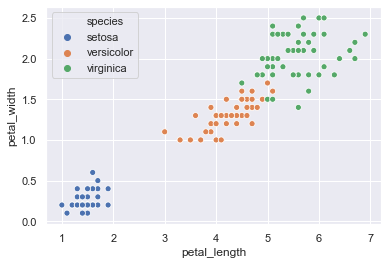

In [3]:
# Scatterplot of petal length and petal width

iris_scatter_petal_length_width = sns.scatterplot(data=df_iris, 
                                                  x='petal_length', 
                                                  y='petal_width', 
                                                  hue='species')
iris_scatter_petal_length_width

<div class="alert alert-block alert-info">
<b><font size="4">Exercise:</font></b> 

<p> 

1. What kind of relationship do you see between petal width and petal length? How does petal width change with petal length?

</p> </div>



From the plot it looks like there is a positive relationship between petal length and petal width. Let's use a model to capture the pattern and make it more explicit. In this case, the relationship looks linear so we can use the form: $y = ax + b$. We are interested in how petal width changes with petal length. We can make a guess at what the parameters for a and b might be. It looks like petal width increases more slowly than petal length, maybe at 0.3 cm for every 1 cm in petal length.

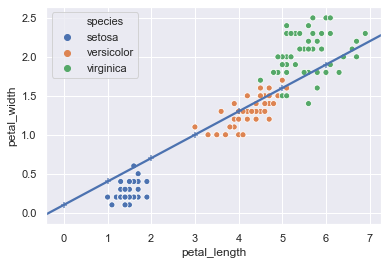

In [4]:
iris_scatter_petal_length_width = sns.scatterplot(data=df_iris, 
                                                  x='petal_length', 
                                                  y='petal_width', 
                                                  hue='species')

x = np.arange(7)
a = 0.3
b = 0.1
y = a*x + b


iris_scatter_petal_length_width = sns.regplot(x=x, 
                                              y=y, 
                                              marker="+")
iris_scatter_petal_length_width

Not bad, but maybe we could do a bit better

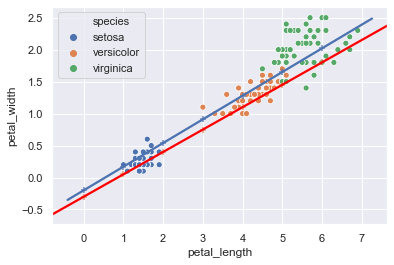

In [5]:
iris_scatter_petal_length_width = sns.scatterplot(data = df_iris, x = 'petal_length', y = 'petal_width', hue = 'species')

x = np.arange(7)
a = 0.37
a1 = 0.35
b = -0.2
b1 = -0.3
y = a*x + b
y1 = a1*x + b1

iris_scatter_petal_length_width = sns.regplot(x=x, y=y, marker="+")
iris_scatter_petal_length_width = sns.regplot(x=x, y=y1, marker="+", line_kws={"color": "red"})
iris_scatter_petal_length_width;

<div class="alert alert-block alert-info">
<b><font size="4">Exercise:</font></b> 

<p> 

1. Your turn, what values would you put for the slope (a2) and the intercept (b2)? Fill in the blanks below to create your own line.

</p> </div>

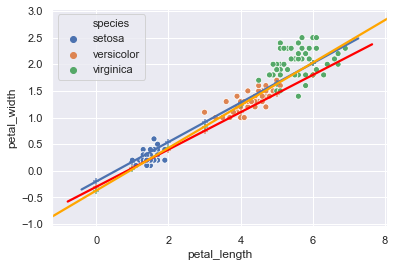

In [6]:
iris_scatter_petal_length_width = sns.scatterplot(data=df_iris, 
                                                  x='petal_length', 
                                                  y='petal_width', 
                                                  hue='species')

x = np.arange(7)
a = 0.37
a1 = 0.35
a2 = 0.4
b = -0.2
b1 = -0.3
b2 = -0.37
y = a*x + b
y1 = a1*x + b1
y2 = a2*x + b2

iris_scatter_petal_length_width = sns.regplot(x=x, 
                                              y=y, 
                                              marker="+")
iris_scatter_petal_length_width = sns.regplot(x=x, 
                                              y=y1, 
                                              marker="+", 
                                              line_kws={"color": "red"})
iris_scatter_petal_length_width = sns.regplot(x=x, 
                                              y=y2, 
                                              marker="+", 
                                              line_kws={"color": "orange"})

iris_scatter_petal_length_width

As you can see by now, all three lines have slightly different parameters. It is difficult to tell by eye which line fits the data better. We could do this ourselves, by measuring the `residuals`, the distance from the data (actual response) to the line (predicted response), for each model, and comparing them. But this can be time-consuming, especially if our goal is to find the best model which could involve looking at more than just two models! 


Luckily python has built-in functions that will explore all the possibilities to find the 'best' line. In linear regression, one of the ways to define the 'best' line is by finding the line that minimizes the sum of squared residuals (aka sum of squares). 

Calculating the sum of squared residuals involves taking the residual distances, squaring them, and summing them. This approach is also called Ordinary Least Squares (OLS), after which the OLS function in python takes its name. 

### Model Construction

Here we use the `statsmodels function api` to construct our models. This allows us to specify an intuitive model formula for our analyses where `formula = y ~ x`. 

In this case `y` is our response variable, the tilde ~ means "depends on" `x`, which represents an explanatory variable (i.e. the variable we are using to try to explain the variation in y). 

#### Model 1: Continuous Variable

Let's take a look at what this looks like in practice. In this case we're interested in explaining the variation in `petal_width` using the explantory variable, `petal_length`.

Note that the smf.ols function automatically includes the intercept in the model, so we don't have to specify one.



In [7]:
model1 = smf.ols(formula='petal_width ~ petal_length', 
                 data=df_iris)

results_mod1 = model1.fit()

print(results_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           4.68e-86
Time:                        12:20:48   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3631      0.040     -9.131   

The summary gives us a range of diagnostic information about the model we've fitted, split into three tables. Here's a quick guide on what is included:

**Top Table - model fit info.**

  * **R-squared/Adj. R-squared** - The proportion of the variance in the response variable ('petal_width') explained by the model. The Adj. R-squared takes into account the number of variables in the model.
  * **No. of Observations** (i.e. measurements of 'petal_width') and  **Df** degrees of freedom (No. of Observations - (1 + No. of variables in the model)).
  * **General info** - date and time that model was run, type of model etc.
  * **Model Fit info** - inc. **F-statistic**, **AIC** and **BIC**, **Log-Likelihood**. They are not meaningful on their own, but allow you to compare different models to assess the best one. 
    
**Middle Table - an important table!**

  * **coef** = coefficient estimates for the intercept and explanatory variables.
  * **std err** = standard errors (i.e. estimate of the uncertainty) of the coefficient estimates.
  * **t** = t-statistic for the t-test comparing whether the coefficient is different to 0.
  * **P>|t|** = p-value for the t statistics, giving significance of coefficient.
  * **[0.025 0.975]** = 95% confidence interval around the coefficient estimate.
    
**Bottom table - Diagnostics**

  * **Jarque-Bera**, **Omnibus**: test normality of residuals.
  * **Cond, No.**: Condition Number, test for multicollinearity.
  * **Durbin-Watson**: test for autocorrelation.


As you can see, there is a lot of information in the summary. Let's focus on a few relevant values from the model to focus on.


<img src="../../images/linear_model_petal_width_vs_length_annotated.png"  width="800" height="800" alt="Results of the model fit with Adjusted R-squared and coefficients and standard error highlighted.">

We can also get these specific parameters directly from the `model` object.

Such as the `Intercept`, `Slope`, `R-squared`


In [8]:
## Extracting the intercept

print("Intercept = ", results_mod1.params['Intercept'])



## Extracting the slope

print("(Petal length) coef. = ", results_mod1.params['petal_length'])


## Extracting the R-squared

print("R^2 = ", results_mod1.rsquared_adj)




Intercept =  -0.36307552131902865
(Petal length) coef. =  0.4157554163524114
R^2 =  0.9266173379025906


## Constructing the line of best fit

The code above is a useful way to pull out information to further analyse or include in reports. We can pull out these coefficients to plot our line of best fit. 

### Scatterplot of line of best fit compared to two different slope and intercepts to describe the relationship between petal width and petal length

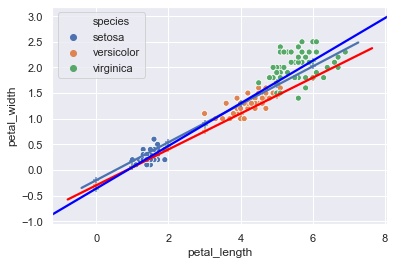

In [9]:
iris_scatter = sns.scatterplot(data=df_iris, 
                               x='petal_length', 
                               y='petal_width', 
                               hue='species')

x = np.arange(7)
a = 0.37
a1 = 0.35

b = -0.2
b1 = -0.3

y = a*x + b
y1 = a1*x + b1
y2 = results_mod1.params['petal_length']*x + results_mod1.params['Intercept']

iris_scatter = sns.regplot(x=x, y=y, marker="+")
iris_scatter = sns.regplot(x=x, y=y1, marker="+", line_kws={"color": "red"})
iris_scatter = sns.regplot(x=x, y=y2, marker="+", line_kws={"color": "blue"})
iris_scatter;

We can do this plot by hand (as above) or directly from our model. 

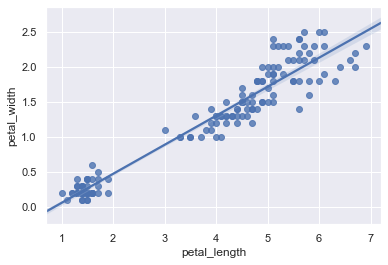

In [10]:
# Scatterplot and line of best fit

iris_best_fit = sns.regplot(data=df_iris,
                            x='petal_length', 
                            y='petal_width', 
                            ci=95)
iris_best_fit;

**Residuals**

We can get the residuals using:

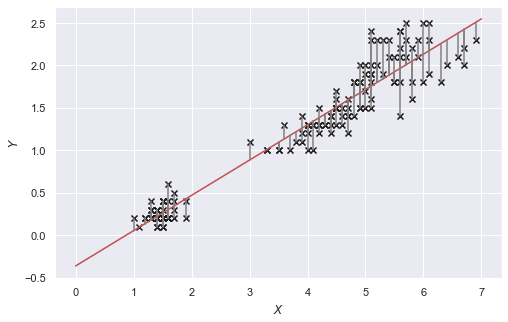

In [11]:
fig, ax2 = plt.subplots(figsize=(8, 5))

x = df_iris.petal_length
y = df_iris.petal_width

xfit = np.arange(8)
yfit = results_mod1.params['petal_length'] * xfit + results_mod1.params['Intercept']

slope = results_mod1.params['petal_length']
intercept = results_mod1.params['Intercept']

# Plot
ax2.scatter(x, y, marker='x', color='k')
ax2.plot(xfit, yfit, color='r')

# plot residuals


def residual_line(x, y, slope, intercept):
    xs = [x, x]
    ys = [y, (intercept + slope * x)]
    return xs, ys


errs = [ax2.plot(*residual_line(x, y, slope, intercept), color='0.5')]
ax2.set_xlabel("$X $", fontsize=12)
ax2.set_ylabel("$Y $", fontsize=12);

We can calculate the residuals to look at the actual vs predicted values and plot these on a graph

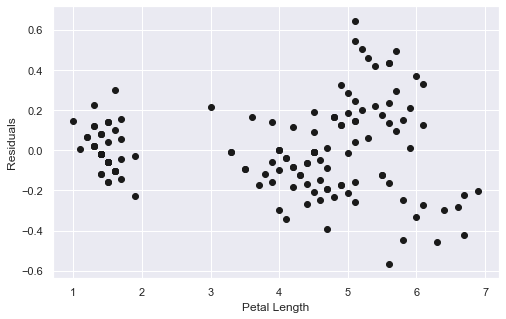

In [12]:
actual = df_iris.petal_width
predicted = results_mod1.params['petal_length'] * df_iris.petal_length + results_mod1.params['Intercept']
difference = actual - predicted

x = df_iris.petal_length

fig, resid_plot = plt.subplots(figsize=(8,5))

resid_plot.scatter(x, difference, marker='o', color='k')
resid_plot.set_xlabel("Petal Length", fontsize=12)
resid_plot.set_ylabel("Residuals", fontsize=12);

We can then calculate the root mean squared error by taking the difference squared and then the square root.

In [13]:
# To get the root mean squared error we need to take the difference squared and then the square root.

difference_squared = difference**2
residuals = difference_squared.apply(math.sqrt)


print(residuals.sum())


23.470577056521144


**Residuals**

We can then inspect the residuals in the model. `Residuals` represent the left over variation in the response variable not explained by the model. A pattern in the residuals may indicate that we are missing a variable or that our assumption of normality is  incorrect. When we are looking at the residuals, we want them to form an 'amorphous cloud', i.e. a cloud shape with no patterns. 


<div class="alert alert-block alert-success">
<b><font size="4"> Residual plots and assumptions </font> </b> 
<p> 
    
* **Residuals vs Fitted:** is used to check the assumptions of linearity. If the residuals are spread equally around a horizontal line without distinct patterns (red line is approximately horizontal at zero), that is a good indication of having a linear relationship.

* **Normal Q-Q:** is used to check the normality of residuals assumption. If the majority of the residuals follow the straight dashed line, then the assumption is fulfilled.

* **Scale-Location:** is used to check the homoscedasticity of residuals (equal variance of residuals). If the residuals are spread randomly and the see a horizontal line with equally (randomly) spread points, then the assumption is fulfilled. 

* **Residuals vs Leverage:** is used to identify any influential value in our dataset. Influential values are extreme values that might influence the regression results when included or excluded from the analysis. Look for cases outside of a dashed line. 

</p>
</div>

We will be focusing today on residuals vs. fitted and the Normal Q-Q plot. 



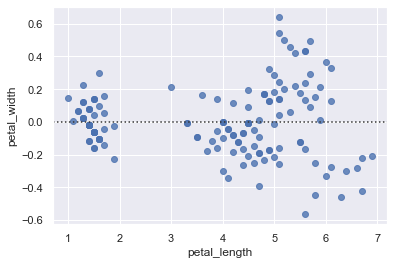

In [14]:
df_iris_resid = sns.residplot(data=df_iris,
                              y='petal_width', 
                              x='petal_length')
df_iris_resid;

It looks like there might be some patterns left in the data that are unexplained. We can see that as `petal_length` increases the variability and range of residual values also increase.

**Checking for normality of the residuals**

One of the assumptions of a linear model is that the residuals are normally distributed. Note that this does not mean that the response variable needs to come from a normal distribution, just that the residuals are normally distributed. Normal distributions are often referred to as bell curves because of their shape. Let's take a look at a normal distribution with mean 0 and variance 1. 

**Normal** 


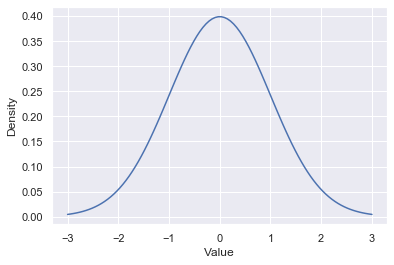

In [15]:
## Inspecting the normal distribution

mu = 0
variance = 1

sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

What you'll notice in the plot above is that it is symmetrical with most values falling close to 0. 


A common plot used to inspect model residuals is a qqplot. The qqplot compares the residuals to a theoretical normal distribution. If the residuals come from a normal distribution we would expect the blue dots to line up with the red line.

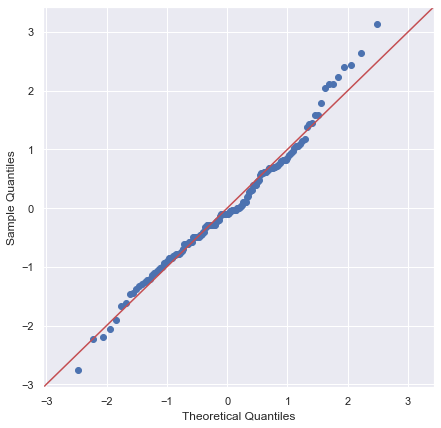

In [16]:
residual = results_mod1.resid

# Use statsmodels qqplot to graph residuals
# make a figure and an axis
f, ax = plt.subplots(figsize=(7,7))

# call the qqplot graph from statsmodels 'graphics' module.
# fits against the normal distribution as standard.
sm.graphics.qqplot(residual, line='45', fit=True, ax=ax);

The plot doesn't look too bad. The residuals mostly match the red line, but we can see that the tails of the qqplot are a little skewed, particularly to the right. This may mean that there is still some structure in the variation in `petal_width` that is not accounted for by `petal_length`.  We can see whether including species in the model helps explain some of the remaining variation in the model. 


#### Model 2: Continuous and Categorical Variables

Now we are constructing our model to explain the variation in `petal_width` using the variables for `petal_length` and `species`. In this case, because species is a categorical variable we can specify it using `C(species)`.




In [17]:
model2 = smf.ols(formula='petal_width ~ petal_length + C(species)',
                 data=df_iris)

results_mod2 = model2.fit()

print(results_mod2.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     845.5
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           4.88e-92
Time:                        13:46:09   Log-Likelihood:                 46.704
No. Observations:                 150   AIC:                            -85.41
Df Residuals:                     146   BIC:                            -73.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

There are a few key things to pick out from the table above. First, we have an increase in the adjusted R^2, which is now 0.944, meaning we've explained 94.4 \% of the variation in petal_length. We also have several variables now:

 * `Intercept`
 * `C(species)[T.versicolor]`
 * `C(species)[T.virginica]`
 * `petal_length`
 
 
But remember that in our `df_iris` dataset there are three species of iris: 

* setosa

* versicolor

* virginica

Categorical variables always contribute to the intercept in a linear model. When fitting the model, the model function uses the first level of the categorical variable, in this case `setosa`, as the baseline `Intercept`. The coefficients estimated for `C(species)[T.versicolor]` and `C(species)[T.virginica]` are estimated in relation to that. 

Let's see how our fit looks when it is plotted.



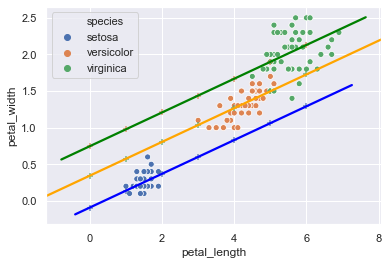

In [18]:
iris_scatter_species = sns.scatterplot(data=df_iris, x='petal_length', y='petal_width', hue='species')

x = np.arange(7)
a = results_mod2.params['petal_length']

b_setosa = results_mod2.params['Intercept']
b_virginica = results_mod2.params['C(species)[T.virginica]'] + results_mod2.params['Intercept']
b_versicolor = results_mod2.params['C(species)[T.versicolor]']  + results_mod2.params['Intercept']


y_setosa = a*x + b_setosa
y_virginica = a*x + b_virginica
y_versicolor = a*x + b_versicolor

iris_scatter_species = sns.regplot(x=x, y=y_setosa, marker="+", line_kws={"color": "blue"})
iris_scatter_species = sns.regplot(x=x, y=y_virginica, marker="+", line_kws={"color": "green"})
iris_scatter_species = sns.regplot(x=x, y=y_versicolor, marker = "+", line_kws={"color": "orange"})

iris_scatter_species

As you can see from the plot above, all of the lines have the same slope so that they are parallel to one another. The only thing that changes is the intercept which moves the fitted line up or down.

Let's see what the residuals look like for our new model.

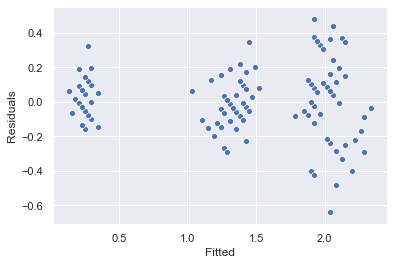

In [19]:
## Residuals for Model 2

residual2 = results_mod2.resid
fitted2 = results_mod2.fittedvalues

resid2_plot = sns.scatterplot(x = fitted2, y = residual2)
resid2_plot.set(xlabel='Fitted', ylabel='Residuals')
resid2_plot

Let's inspect the qqplot

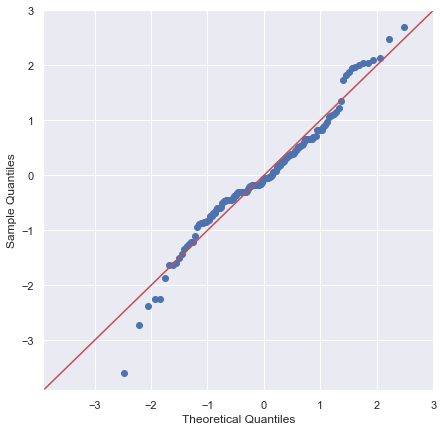

In [20]:
# Use statsmodels qqplot to graph errors
# make a figure and an axis
f, ax = plt.subplots(figsize=(7,7))
# call the qqplot graph from statsmodels 'graphics' module.
# fits against the normal distribution as standard.

sm.graphics.qqplot(residual2, line='45', fit=True, ax=ax);


Now our residuals are slightly skewed to the left. Is there something more we might be missing from the model? 

#### Model 3: Interactions

So far we've allowed the intercept in our model to vary by species. Let's try letting our slope change also with species. By allowing our slope to vary by species we are exploring the hypothesis that **how** `petal_width` **changes** with `petal_length` varies by species. 

To do this in the model, we need to use an interaction term. Interactions are included using the multiplication symbol $*$ between two variables.

In [21]:
## Specifying Model 3 and the resulting model fit

model3 = smf.ols(formula='petal_width ~ petal_length*C(species)', data=df_iris)

results_mod3 = model3.fit()

print(results_mod3.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     521.9
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           2.34e-90
Time:                        13:51:49   Log-Likelihood:                 49.695
No. Observations:                 150   AIC:                            -87.39
Df Residuals:                     144   BIC:                            -69.33
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

If we look at the results, we can see that the slope for `petal_length` also uses setosa (the species name that is missing) as a baseline.


We can plot the model fit using our new coefficients. This time, both the slope and intercept will vary. 


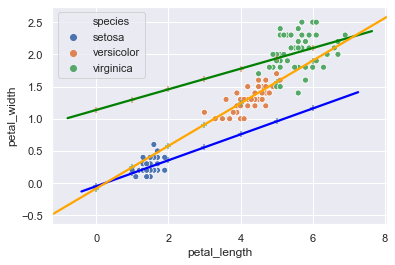

In [22]:
iris_scatter_species = sns.scatterplot(data = df_iris, x = 'petal_length', y = 'petal_width', hue = 'species')

x = np.arange(7)

##Slope
a_setosa = results_mod3.params['petal_length']

a_virginica = results_mod3.params['petal_length:C(species)[T.virginica]'] + results_mod3.params['petal_length']

a_versicolor = results_mod3.params['petal_length:C(species)[T.versicolor]'] + results_mod3.params['petal_length']

## Intercept
b_setosa = results_mod3.params['Intercept']

b_virginica = results_mod3.params['C(species)[T.virginica]'] + results_mod3.params['Intercept']

b_versicolor = results_mod3.params['C(species)[T.versicolor]'] + results_mod3.params['Intercept']

##Predicted Petal Width
y_setosa = a_setosa*x + b_setosa

y_virginica = a_virginica*x + b_virginica

y_versicolor = a_versicolor*x + b_versicolor

## Line of best fit

iris_scatter_species = sns.regplot(x = x, y = y_setosa, marker= "+", line_kws = {"color": "blue"})

iris_scatter_species = sns.regplot(x = x, y = y_virginica, marker = "+", line_kws = {"color": "green"})

iris_scatter_species = sns.regplot(x = x, y = y_versicolor, marker = "+", line_kws = {"color": "orange"})

iris_scatter_species


**Extrapolation**

The plot above shows an important mistake that we want to avoid when plotting and using our line of best fit to make predictions.


You'll notice from the plot above that the setosa iris petal length only ranges from 1-2 cm. This is very different from the virginica iris where the petal length ranges from 4-7. 

Why is this important? When we plot the line making predictions for the petal width, it's not correct to extrapolate beyond areas that we have observed, because at least in this data set, we've never seen a setosa iris with petal length 6. 

<div class="alert alert-block alert-info">
<b><font size="4">Exercise:</font></b> 

<p> 

1. Update the plot below so that the x-values, petal length, vary according to the species. For example, I've updated the x in this case to only show values for the petal length observed for the setosa species. Add an x1 and x2 for virginica and versicolor with the appropriate range of petal length values for each species.
We also need to add `truncate = True` to the regplot function so that it does not make the line for the full x-axis.


</p> </div>

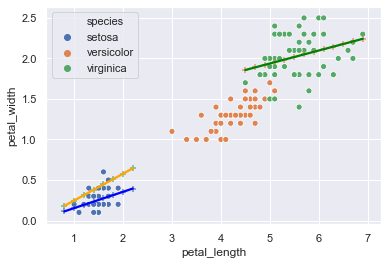

In [26]:

iris_scatter_species = sns.scatterplot(data = df_iris, x = 'petal_length', y = 'petal_width', hue = 'species')

x = np.arange(0.8, 2.3, 0.2) # setosa
x1 = np.arange(df_iris[df_iris['species'] == 'virginica']['petal_length'].min(), df_iris[df_iris['species'] == 'virginica']['petal_length'].max(), 0.2) # virginica
# versicolor

##Slope
a_setosa = results_mod3.params['petal_length']

a_virginica = results_mod3.params['petal_length:C(species)[T.virginica]'] + results_mod3.params['petal_length']

a_versicolor = results_mod3.params['petal_length:C(species)[T.versicolor]'] + results_mod3.params['petal_length']

## Intercept
b_setosa = results_mod3.params['Intercept']

b_virginica = results_mod3.params['C(species)[T.virginica]'] + results_mod3.params['Intercept']

b_versicolor = results_mod3.params['C(species)[T.versicolor]'] + results_mod3.params['Intercept']

##Predicted Petal Width
y_setosa = a_setosa*x + b_setosa

y_virginica = a_virginica*x1 + b_virginica

y_versicolor = a_versicolor*x + b_versicolor

## Line of best fit

iris_scatter_species = sns.regplot(x = x, y = y_setosa, marker= "+", line_kws = {"color": "blue"}, truncate = True)

iris_scatter_species = sns.regplot(x = x1, y = y_virginica, marker = "+", line_kws = {"color": "green"}, truncate = True)

iris_scatter_species = sns.regplot(x = x, y = y_versicolor, marker = "+", line_kws = {"color": "orange"}, truncate = True)

iris_scatter_species


**Residuals Model 3**

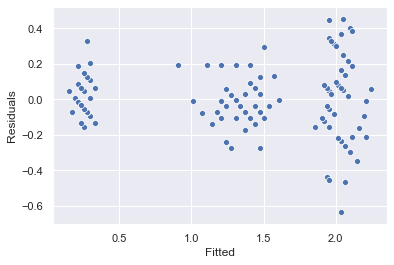

In [27]:
residual3 = results_mod3.resid
fitted3 = results_mod3.fittedvalues

resid3_plot = sns.scatterplot(x = fitted3, y = residual3)
resid3_plot.set(xlabel='Fitted', ylabel='Residuals')
resid3_plot

**The qqplot for Model 3**

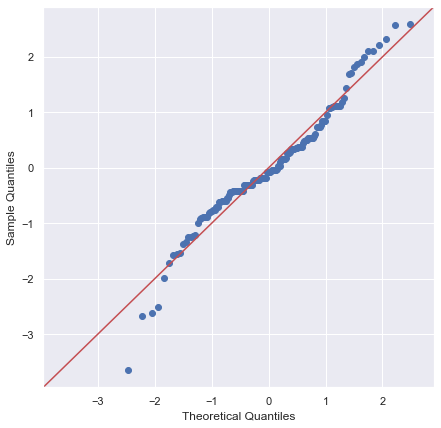

In [28]:

# Use statsmodels qqplot to graph errors
# make a figure and an axis
f, ax = plt.subplots(figsize=(7,7))
# call the qqplot graph from statsmodels 'graphics' module.
# fits against the normal distribution as standard.

sm.graphics.qqplot(residual3, line='45', fit=True, ax=ax);



### Model Comparison

So how can we decide which model is better? There are a few metrics we can compare between the model that can be found in the top table. The three main ones we will discuss in this course are the `Adjusted R^2`, `AIC`, and `BIC`. Before getting to these concepts, let's discuss the concept of `parsimony` and `Occam's Razor`.

**Occam's Razor: law of parsimony**

`Parsimony` (aka `Occam's razor`) is a general argument for choosing simpler models even though we know the world is complex. Occam's razor says that when presented with competing hypotheses that make the same predictions, we should select the solution with the fewest assumptions. This is to say that all other things being equal, we should prefer a simpler model to a more complex one, especially when the data don't tell a clear story. 

Model selection approaches often go beyond parsimony to say that a more complex model must not be just better than, but a specified amount better than, a simpler model.

**Practical Considerations**

There is also a practical element to parsimony; simple theories are easier to test than complex ones. Similarly, simple models often do a better job at predicting. Because a simpler model requires fewer parameters it is also less expensive in terms of time or money to collect the data for it. 

**We need to draw the line somewhere**

"With four parameters I can fit an elephant, and with five I can make him wiggle his trunk" ~ John Von Neumann



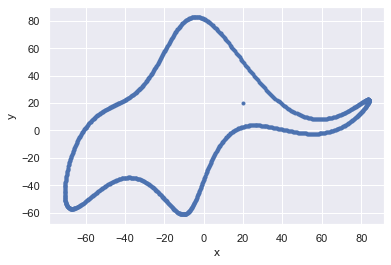

In [29]:
#Author: Piotr A. Zolnierczuk (zolnierczukp at ornl dot gov)

#Based on a paper by:
#Drawing an elephant with four complex parameters
#Jurgen Mayer, Khaled Khairy, and Jonathon Howard,
#Am. J. Phys. 78, 648 (2010), DOI:10.1119/1.3254017


import numpy as np
import pylab

# elephant parameters
p1, p2, p3, p4 = (50 - 30j, 18 +  8j, 12 - 10j, -14 - 60j )
p5 = 40 + 20j # eyepiece

def fourier(t, C):
    f = np.zeros(t.shape)
    A, B = C.real, C.imag
    for k in range(len(C)):
        f = f + A[k]*np.cos(k*t) + B[k]*np.sin(k*t)
    return f

def elephant(t, p1, p2, p3, p4, p5):
    npar = 6
    Cx = np.zeros((npar,), dtype='complex')
    Cy = np.zeros((npar,), dtype='complex')

    Cx[1] = p1.real*1j
    Cx[2] = p2.real*1j
    Cx[3] = p3.real
    Cx[5] = p4.real

    Cy[1] = p4.imag + p1.imag*1j
    Cy[2] = p2.imag*1j
    Cy[3] = p3.imag*1j

    x = np.append(fourier(t,Cx), [-p5.imag])
    y = np.append(fourier(t,Cy), [p5.imag])

    return x,y

x, y = elephant(np.linspace(0,2*np.pi,1000), p1, p2, p3, p4, p5)
pylab.plot(y,-x,'.')
pylab.xlabel('x')
pylab.ylabel('y')
pylab.show()

As we add more parameters to a model, we necessarily get an increasingly accurate fit to the particular data we have observed (the bias of our predictions decreases), but our precision for predicting future observations decreases as well (the varaince of our predictions increases). 

One way to think about it is that data contain a fixed amount of information; as we estimate more and more parameters we spread the data thinner and thinner. Eventually the gain in accuracy from having more details in the model is outweighed by the loss in precision from estimating the effect of each of those details more poorly.

**Adjusted R^2**

R-squared is a goodness-of-fit measure for linear regression models. It indicates the percentage of the variance in the response variable explained by the explanatory variables. It is calculated by:


$\frac{\text{Variance explained by the model}}{ \text{Total variance}}$. 

**Likelihood**

The `likelihood` is the probability of the observed outcome (i.e. the data) given a particular choice of parameters. For a particular statistical model, maximum likelihood finds the set of parameters *that makes the observed data most likely to have occurred*. That is, we find the set of parameters that makes the likelihood as large as possible.

<img src="../../images/likelihood_example.png"  width="800" height="800" alt="Maximum likelihood example.">
Image Credit: Ashan Priyadarshan. [Maximum likelihood](https://medium.com/quick-code/maximum-likelihood-estimation-for-regression-65f9c99f815d)

The diagram above shows what is happening when you are calculating the maximum likelihood. Here, we have a line of best fit, with the estimated values of the response variable $\hat y_{1...n}$ (red dots). The actual values of the response variable (our data), are reperesented by the black dots. The residuals are indicated by the $\epsilon$. These residual is the distance between the actual value of the response variable and the estimated value of the response variable. 

When we are calculating the maximum likelihood, we are looking for the parameters that maximise the likelihood of the data. The horizontal arrows trace up to the normal distribution which represents the fit. The closer to the peak of the distribution the data falls the "more likely" the data is given the parameters. 

For mathematical convience, we often work with the logarithm of the likelihood (the *log-likelihood*) instead of the likelihood. However, the parameters that give the maximum log-likelihood also give the maximum likelihood. 

**Information criteria**

**Information criteria** are based on the expected distance between a particular model and the "true" model. All information-theoretic methods reduce to finding the model that minimizes some criterion that is the sum of a term based on the likelihood (usually twice the negative log-likelihood) and a *penalty term* which is different for different information criteria. 

Selecting models based on information criteria allows for the comparison of all candidate models at once, provided they are fit to the same data. If there are missing values in certain variables and not others, the model will exclude these data when fitting by default, so you need to be careful that you are not comparing models which have been fit to different datasets. 


 * **AIC**
The `Akaike Information Criterion`, or AIC, is the most widespread information criterion, and is defined as

$\text{AIC} = -2L + 2k$

where $L$ is the log-likelihood and $k$ is the number of parameters in the model. As with all information criteria, small values represent better overall fits; adding a parameter with a negligible improvement in fit penalizes the AIC by 2 log-likelihood units.


**Some rough guidance for AIC**

1. Lower values of AIC indicated a better fit to the data regardless of whether they are positive or negative.
    * If you have two models with AIC: -213.09, and -289.12. The model with AIC -289.12 is better.
2. AIC comparisons are only valid for models that are fit to the same response data (i.e. same y)

For AIC, the rule of thumb people generally follow is that improvements of greater than 2 mean we can select the more complicated model.

* **BIC**
The second most common information criterion, the *Bayesian* information criterion (BIC), uses a penalty term of $(log n)k$. The BIC is more conservative than the AIC, insisting on a greater improvement in fit before it will accept a more complex model. 

**Model Selection when there are several possibilities**

Models with multiple parameters and possible interactions between variable lead to a large number of models to try. Two simple approaches to model selection include:

* **forward selection** (add parameters one at a time to the simplest model)
* **backward selection** (subtract parameters from the most complex model). 

With too large a set of possibilities this can mean that you may arrive at a different best model depending on which approach you take. There are some algorithms to do a combination or forward and backward selection. However, you want to be careful that this kind of model selection does not devolve into data-dredging. 

You should:

1. Use common sense and domain knowledge to isolate the most important comparisons
2. Raw plots of the best candidate fits to try to understand why different models fit the data approximately equally well. 

<div class="alert alert-block alert-success">
<b><font size="4"> Exercises: </font> </b> 
<p> 

1. Let's compare the models we ran using Adjusted R^2 and AIC. Using the notes above, discuss in groups which model you think is best and why?

2. Take a look at the main parameters of Model 2 and Model 3 from the model summary tables. Do they seem to vary much between the models?

</p>
</div>

**Adjusted R^2**

In [30]:
## Model Comparison: Comparing Adjusted R^2
## \n will put the results on the next line!

print("Adjusted R^2 Model 1 = ", results_mod1.rsquared_adj, "\nAdjusted R^2 Model 2 = ", results_mod2.rsquared_adj
, "\nAdjusted R^2 Model 3 = ", results_mod3.rsquared_adj)


Adjusted R^2 Model 1 =  0.9266173379025906 
Adjusted R^2 Model 2 =  0.944455796412463 
Adjusted R^2 Model 3 =  0.9458862539383163


**AIC**

In [31]:
print("AIC Model 1 = ", results_mod1.aic, "\nAIC Model 2 = ", results_mod2.aic, "\nAIC Model 3 = ", results_mod3.aic)


AIC Model 1 =  -45.59109158022039 
AIC Model 2 =  -85.40821914792849 
AIC Model 3 =  -87.39085622323768


<div class="alert alert-block alert-success">
<b><font size="4"> Case Study: Department Salaries </font> </b> 
<p> 

Open up the notebook to explore the department salaries.

</p>
</div>
